# Mathematik für Biologiestudierende

Wintersemester 2025/26

28. Oktober 2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)


## Themen heute

* Bearbeitung von Datensätzen
* Histogramme und Balkendiagramme
* Lageparameter
  * arithmetisches Mittel
  * Median

In [10]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd

# Bearbeitung von Datensätzen

In [11]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Daten eines beliebigen Pinguins

In [12]:
df.loc[150]

species              Adelie
island                Dream
bill_length_mm         36.0
bill_depth_mm          17.1
flipper_length_mm     187.0
body_mass_g          3700.0
sex                  Female
Name: 150, dtype: object

* Die Spalte ohne Überschrift ist der Index
* In der Regel wird der Index von `pandas` automatisch angelegt
* Zugriff auf Zeilen durch `df.loc[n]` wenn `n` die Nummer der Zeile im Index ist

#### Zugriff auf eine Spalte

In [13]:
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

Alternativ

In [14]:
df.body_mass_g

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

Das ist weniger Tipparbeit, klappt aber nur, wenn der Spaltenname keine Leerzeichen enthält

#### Welche Pinguinarten wurden angetroffen?

In [15]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Pinguine

|Adelie Pinguin |Zügelpinguin      |Eselspinguin   |
|:-------------:|:----------------:|:-------------:|
|Adelie penguin |Chinstrap penguin |Gentoo penguin |
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Antarctic%2C_adelie_penguin_%28js%29_57.jpg/250px-Antarctic%2C_adelie_penguin_%28js%29_57.jpg" alt="Adeliepinguin" width="200px"/>|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chinstrap_Penguin.jpg/330px-Chinstrap_Penguin.jpg" alt="Zügelpinguin" width="205px">|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Pygoscelis_papua.jpg/250px-Pygoscelis_papua.jpg" alt="Eselspinguin" width="225px">    |

#### Auswahl aus der Tabelle

Alle weiblichen Pnguine

In [16]:
dfw = df[df.sex=='Female']
dfw

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,Female
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female


* `==` Vergleich
* nicht zu Verwechseln mit `=` Zuweisung an eine Variable

* `!=`  ungleich

* `>`, `>=`  größer bzw. größer oder gleich
* `<`, `<=`  kleiner bzw. kleiner oder gleich

Alle Pinguine, die mehr als 4800g wiegen

In [17]:
df_schwer = df[df.body_mass_g > 5500]
df_schwer

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,Male
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,Male
249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


In [18]:
df_schwer.count()

species              28
island               28
bill_length_mm       28
bill_depth_mm        28
flipper_length_mm    28
body_mass_g          28
sex                  28
dtype: int64

alle Pinguine, deren Schnabellänge nicht bestimmt werden konnte

In [19]:
df[df.bill_length_mm.isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Alle weiblichen Pinguine von der Insel Dream mit Schnabellänge kleiner oder gleich 36mm

In [20]:
df[(df.island=='Dream') & (df.sex=='Female') & (df.bill_length_mm <= 36)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female
48,Adelie,Dream,36.0,17.9,190.0,3450.0,Female
90,Adelie,Dream,35.7,18.0,202.0,3550.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
136,Adelie,Dream,35.6,17.5,191.0,3175.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


* Die runden Klammern sind erforderlich
* `&` und-Verknüpfung in Tabellen
* `|` oder-Verknüpfung in Tabellen

# Histogramme und Balkendiagramme

* Balkendiagramm:  Für jeden möglichen Wert ein Balken, der die Anzahl anzeigt
* Histogramm:  Wie Balkendiagramm, aber Werte werden vorher in Klassen zusammengefasst

  Bei Stichprobenumfang $n$: Anzahl der Klassen ungefähr $\sqrt n$

## Histogramm

#### Beispiel Barsche

In [21]:
df = pd.read_csv("https://www.math.uni-duesseldorf.de/~braun/bio2526/barsche.csv")
df

,Nr,Art,Länge
0,1,gestreift,10.7
1,2,gestreift,10.0
2,3,gestreift,9.8
3,4,gestreift,10.3
4,5,gestreift,10.3
...,...,...,...
115,116,blau,12.1
116,117,blau,12.5
117,118,blau,12.0
118,119,blau,12.1


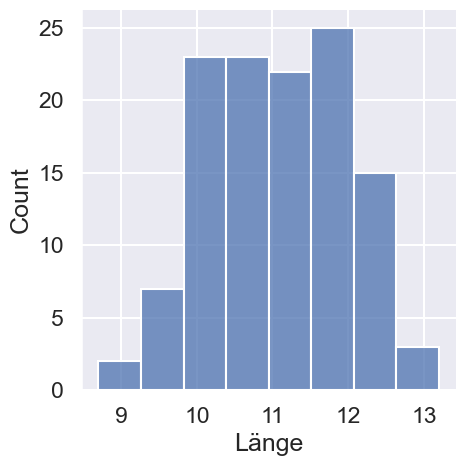

In [22]:
sns.displot(df, x='Länge');

Die Anzahl der Fächer (bins) kann eingestellt werden

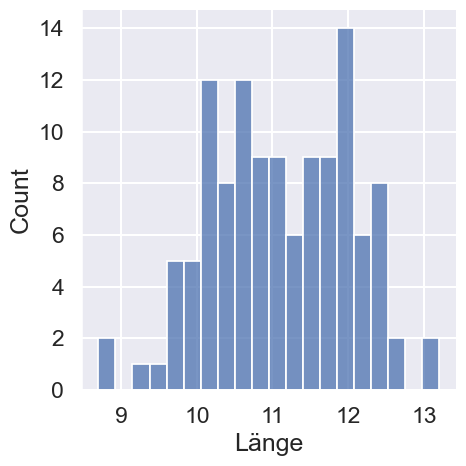

In [23]:
sns.displot(df, x='Länge', bins=20);

Alternativ können die Fächer auch explizit angegeben werden

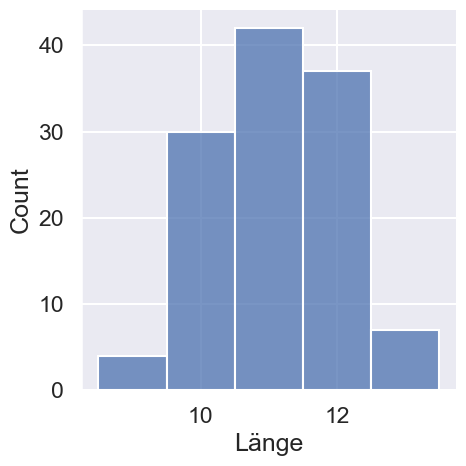

In [24]:
sns.displot(df, x='Länge', bins = np.arange(9, 15)-0.5);

Berücksichtigung der Art:

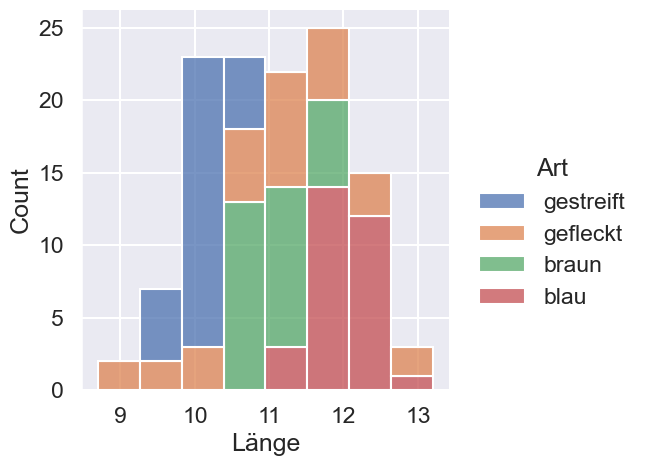

In [25]:
sns.displot(df, x='Länge', hue='Art', multiple='stack');

Die verschiedenen Arten sind also unterschiedlich groß

## Balkendiagramm

Bei qualitativen Merkmalen spricht man von kategoriellen Daten.  Zählt man die Vorkommen, erhält man ein Balkendiagramm.

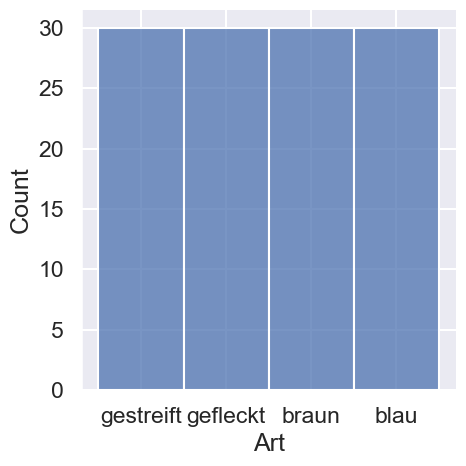

In [26]:
sns.displot(df, x='Art');

Langweilig

#### zurück zu den Pinguinen

In [27]:
df = sns.load_dataset('penguins')

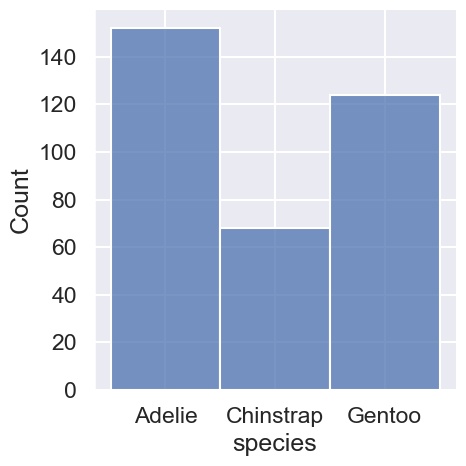

In [28]:
sns.displot(df, x='species');

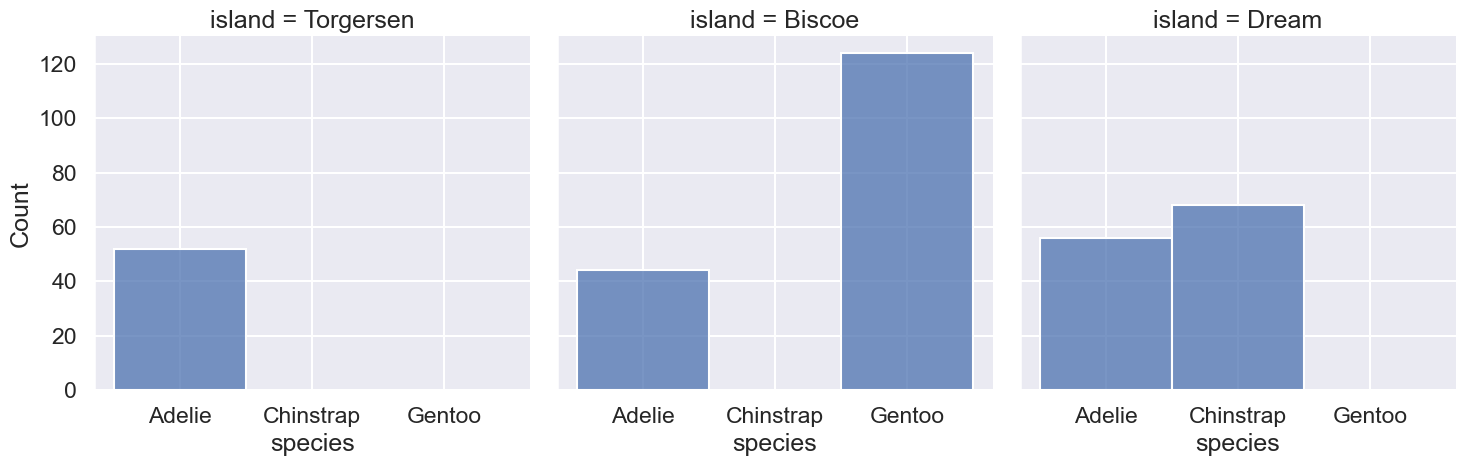

In [29]:
sns.displot(df, col='island', x='species');

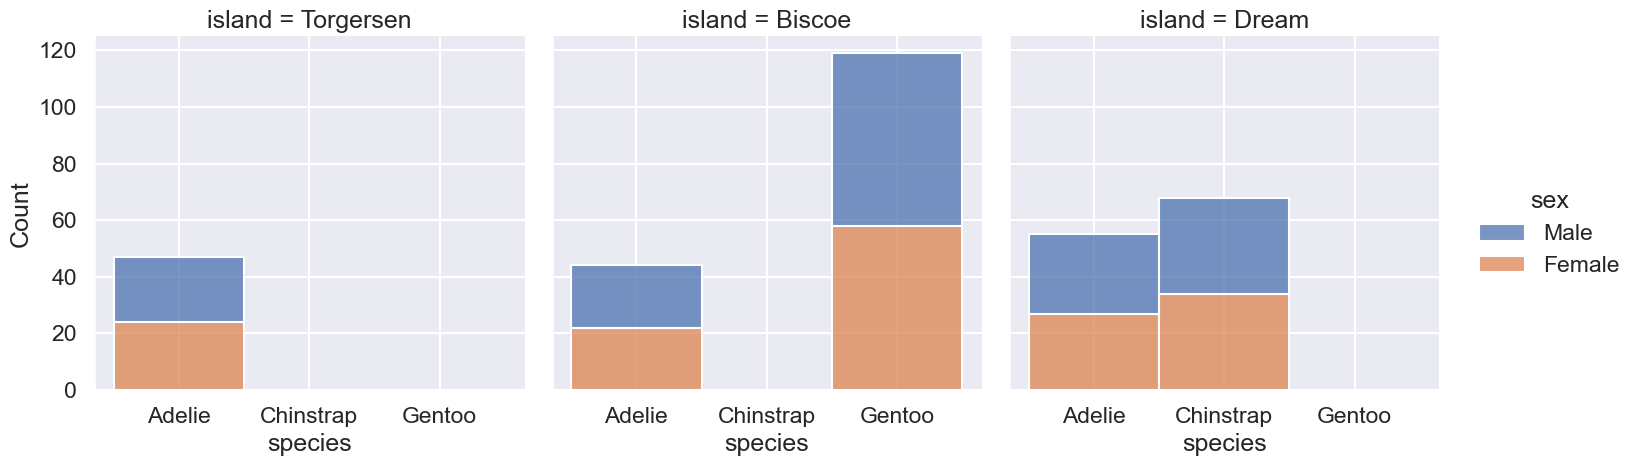

In [30]:
sns.displot(df, col='island', x='species', hue='sex', multiple="stack");
#sns.displot(df, col='island', x='species', hue='sex');

## `displot`

`displot(df, x, col, hue, binwidth)`  

* df:  DataFrame
* x: Variable auf der x-Achse, deren Elemente gezählt werden sollen, quantitativ oder kategoriell
* col: für jeden Wert dieser Variable wird ein Bild gezeichnet, kategoriell (optional) (Spalte ist engl. "column")
* hue: Unterteilung der Zählung, durch Farben ausgedrückt, kategoriell (optional) (Farbtönung ist engl. "hue")
* bins:
  * entweder Anzahl der Fächer
  * oder die Grenzen der Fächer als List

Die Angaben für `x`, `col` und `hue` beziehen sich auf Spaltennamen des DataFrame, sie werden in Anführungszeichen gesetzt

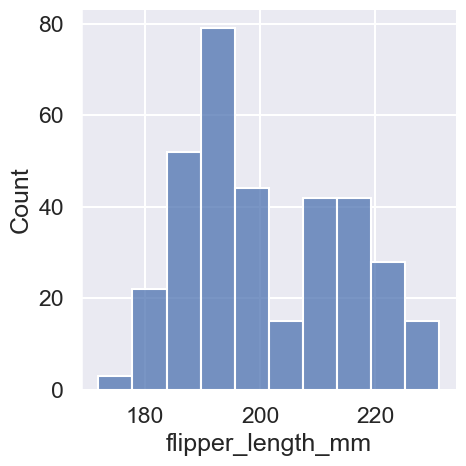

In [31]:
sns.displot(df, x='flipper_length_mm');

Die Verteilung ist *bimodal*, d. h. es gibt zwei Maxima.

Das könnte daran liegen, dass die beiden Geschlechter unterschiedliche Flügellängen haben.  Wir betrachten nur die weiblichen Pinguine

Wir oben haben die Daten der weiblichen Pinguine im DataFrame `dfw` gespeichert

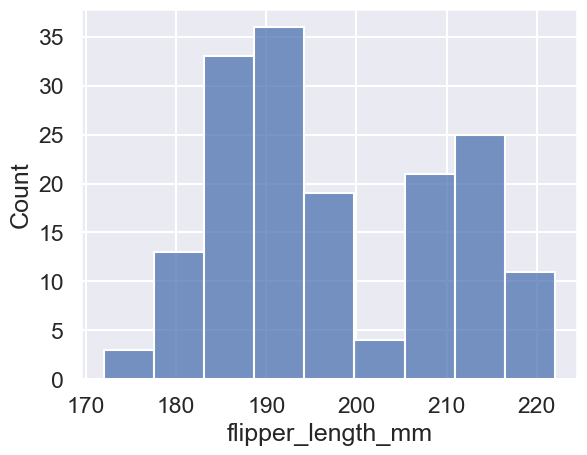

In [32]:
sns.histplot(dfw, x="flipper_length_mm");

Immer noch bimodal.  Also ist das Geschlecht nicht der Grund.  Vielleicht die verschiedenen Arten?

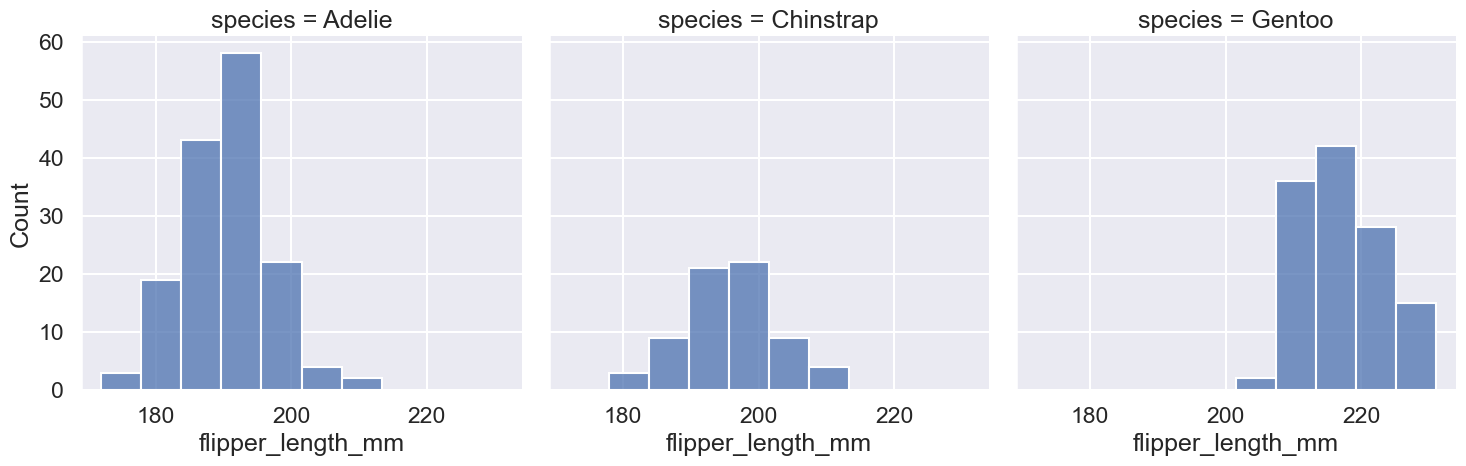

In [33]:
sns.displot(df, x="flipper_length_mm", col="species"); 

Verschiedene Arten haben unterschiedliche Flügellängen

Jetzt noch mit Berücksichtigung des Geschlechts

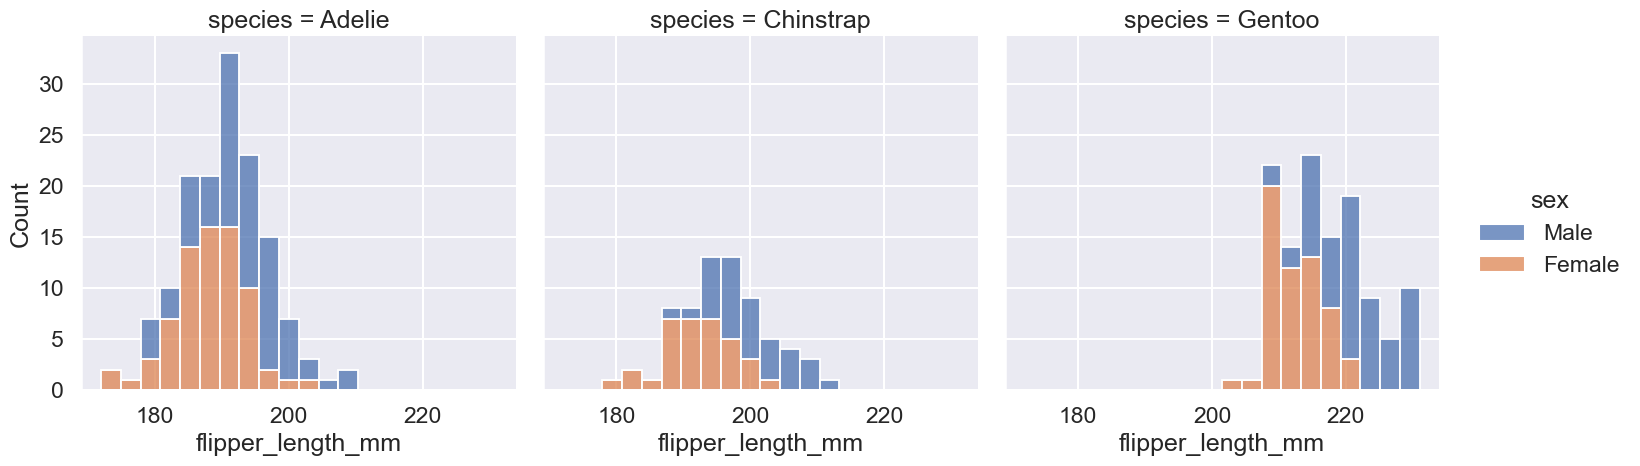

In [34]:
sns.displot(df, x="flipper_length_mm", col="species", hue='sex', binwidth=3, 
            multiple='stack');

# Deskriptive Statistik

# Lageparameter

## Arithmetisches Mittel

Das arithmetische Mittel (engl. "mean") ist der Durchschnitt der Messwerte

Formel:  Beim Stichprobenumfang $n$ seien $ x_1, x_2, x_3, \dots,  x_n $ die Messwerte, dann ist das arithmetische Mittel gleich

$$
    \overline x = \frac1n \left( x_1 + x_2 + x_3 + \dots + x_n \right)
$$

  Man schreibt auch
  \begin{equation*}
    \overline x = \frac1n \sum_{j=1}^n x_j
  \end{equation*}

$\displaystyle \sum$   ist das Summenzeichen. 

* Unter dem Zeichen stehen zwei Informationen:  Der Name der Zählvariablen (hier $j$) und der Startwert der Zählung (hier $1$).  
* Über dem Zeichen steht der Endpunkt der Zählung (hier der Stichprobenumfang $n$)
* Rechts neben dem Zeichen steht, was aufzuzählen ist (hier $x_j$)

#### Beispiel

Bei fünf Mäusen sind die Gewichte 21.3g, 19.8g, 20.4g, 19.0g und 22.7g gemessen worden.  Was ist der Mittelwert?

* Die Summe beträgt 103.2g.
* 103.2/5 = 20.64
* Das arithmetische Mittel der Mausgewichte beträgt 20.64g

Das ist mit dem Taschenrechner kein Problem

Trotzdem noch mal mit `pandas`

In [35]:
maeuse = pd.DataFrame()  #  leerer DataFrame

In [36]:
maeuse['Gewicht'] = [21.3, 19.8, 20.4, 19.0, 22.7]
maeuse

,Gewicht
0,21.3
1,19.8
2,20.4
3,19.0
4,22.7


In [37]:
maeuse.mean()

Gewicht    20.64
dtype: float64

In [39]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
df.body_mass_g.mean()

4201.754385964912

## Median

Der Median ist ein Wert mit der Eigenschaft, dass in der Menge der nach Größe geordneten Messwerte gleich viele Daten unterhalb und oberhalb des Medians liegen.

Beispiel:  7 Messwerte

10 | 5 | 4 | 9 | 10 | 1 | 5

Nach Größe anordnen

1 | 4 | 5 | 5 | 9 | 10 | 10

Der Median ist $x_{\text{med}} = 5$

### Median für geraden Stichprobenumfang
  
* Falls die Anzahl der Daten gerade ist, stehen in der Menge der nach Größe geordneten Messwerte zwei Zahlen in der Mitte.
* Der Median ist dann das arithmetische Mittel der beiden Zahlen in der Mitte

10 | 5 | 4 | 9 | 10 | 1 | 5 | 8

Nach Größe anordnen

1 | 4 | 5 | 5 | 8 | 9 | 10 | 10

Der Median ist $x_{\text{med}} = 6.5$ 

In [42]:
maeuse.median()

Gewicht    20.4
dtype: float64

Bei normalverteilten Daten liegen arithmetisches Mittel und Median nahe beieinander

### Einkommensverteilung

* Beim Einkommen ziehen die sehr gut verdienenden das arithmetische Mittel nach oben,
* beeinflussen den Median aber kaum

Daten von finanz.de für 2024

* Durchschnittsgehalt: 50.250€
* Median des Gehalts:  43.750€

## Robustheit

* Ein *Ausreißer* ist ein Messwert, der weit von fast allen anderen Messwerten entfernt ist.  Ausreißer können z.B. von
    Fehlern beim Experiment herrühren.
* Eine statistische Größe ist *robust*, wenn sie unempfindlich gegen Ausreißer ist.
* Das arithmetische Mittel ist nicht robust.  
* Der Median ist robust

### Beispiel zur Robustheit

In [53]:
maeuse2 = pd.DataFrame()
maeuse2['Gewicht'] = [21.3, 19.8, 20.4, 19.0, 22.7, 287] 
maeuse2

,Gewicht
0,21.3
1,19.8
2,20.4
3,19.0
4,22.7
5,287.0


Dieselben Mäuse wie vorher plus eine Ratte

In [46]:
maeuse.mean()

Gewicht    20.64
dtype: float64

In [47]:
maeuse2.mean()

Gewicht    65.033333
dtype: float64

In [48]:
maeuse.median()

Gewicht    20.4
dtype: float64

In [49]:
maeuse2.median()

Gewicht    20.85
dtype: float64

Fotos:
* Adelie Pinguin: https://commons.wikimedia.org/wiki/User:Jerzystrzelecki
* Zügelpinguin: https://www.flickr.com/people/9464116@N08
* Eselspinguin: https://commons.wikimedia.org/wiki/User:Stan_Shebs